In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fid-data/VIW_FID_EPI.csv


# Data Preview

## Getting the data

In [16]:
df = pd.read_csv("/kaggle/input/fid-data/VIW_FID_EPI.csv")

<ipython-input-16-413ab6d86d06>:1: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/fid-data/VIW_FID_EPI.csv")


## Let's check out some features

### Glimpse

In [17]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,ISOYW,...,GEOSPREAD_COMMENTS,COMMENTS,ILI_NB_SITES,SARI_NB_SITES,ARI_NB_SITES,PNEU_NB_SITES,MMWR_WEEKSTARTDATE,MMWR_YEAR,MMWR_WEEK,MMWRYW
0,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-09,2024,50,202450,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-08,2024,50,202450
1,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-16,2024,51,202451,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-15,2024,51,202451
2,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-16,2024,51,202451,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-15,2024,51,202451
3,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2025-01-27,2025,5,202505,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-26,2025,5,202505
4,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2025-02-24,2025,9,202509,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-23,2025,9,202509


### Dimensions

In [18]:
df.shape

(524329, 38)

In [19]:
df.info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.info of        WHOREGION FLUSEASON HEMISPHERE          ITZ COUNTRY_CODE  \
0            AFR        NH         NH  FLU_NRT_AFR          DZA   
1            AFR        NH         NH  FLU_NRT_AFR          DZA   
2            AFR        NH         NH  FLU_NRT_AFR          DZA   
3            AFR        NH         NH  FLU_NRT_AFR          DZA   
4            AFR        NH         NH  FLU_NRT_AFR          DZA   
...          ...       ...        ...          ...          ...   
524324       WPR        YR         NH  FLU_SE_ASIA          VNM   
524325       WPR        YR         NH  FLU_SE_ASIA          VNM   
524326       WPR        YR         NH  FLU_SE_ASIA          VNM   
524327       WPR        YR         NH  FLU_SE_ASIA          VNM   
524328       WPR        YR         NH  FLU_SE_ASIA          VNM   

       COUNTRY_AREA_TERRITORY ISO_WEEKSTARTDATE  ISO_YEAR  ISO_WEEK   ISOYW  \
0                     Algeria        2024-12-09      2024        50  202450   
1    

In [20]:
df.dtypes

WHOREGION                  object
FLUSEASON                  object
HEMISPHERE                 object
ITZ                        object
COUNTRY_CODE               object
COUNTRY_AREA_TERRITORY     object
ISO_WEEKSTARTDATE          object
ISO_YEAR                    int64
ISO_WEEK                    int64
ISOYW                       int64
AGEGROUP_CODE              object
ILI_CASE                  float64
ILI_OUTPATIENTS           float64
ILI_POP_COV               float64
SARI_CASE                 float64
SARI_INPATIENTS           float64
SARI_POP_COV              float64
SARI_DEATHS               float64
ARI_CASE                  float64
ARI_OUTPATIENTS           float64
ARI_POP_COV               float64
PNEU_CASE                 float64
PNEU_INPATIENTS           float64
PNEU_POP_COV              float64
GEOSPREAD                 float64
IMPACT                    float64
INTENSITY                 float64
TREND                     float64
GEOSPREAD_COMMENTS         object
COMMENTS      

In [21]:
df.isnull().any()

WHOREGION                 False
FLUSEASON                  True
HEMISPHERE                 True
ITZ                        True
COUNTRY_CODE              False
COUNTRY_AREA_TERRITORY    False
ISO_WEEKSTARTDATE         False
ISO_YEAR                  False
ISO_WEEK                  False
ISOYW                     False
AGEGROUP_CODE              True
ILI_CASE                   True
ILI_OUTPATIENTS            True
ILI_POP_COV                True
SARI_CASE                  True
SARI_INPATIENTS            True
SARI_POP_COV               True
SARI_DEATHS                True
ARI_CASE                   True
ARI_OUTPATIENTS            True
ARI_POP_COV                True
PNEU_CASE                  True
PNEU_INPATIENTS            True
PNEU_POP_COV               True
GEOSPREAD                  True
IMPACT                     True
INTENSITY                  True
TREND                      True
GEOSPREAD_COMMENTS         True
COMMENTS                   True
ILI_NB_SITES               True
SARI_NB_

## Getting the percentage of NaN values

In [22]:
(df.isnull().sum() / df.shape[0]) * 100

WHOREGION                   0.000000
FLUSEASON                   0.045773
HEMISPHERE                  0.045773
ITZ                         0.030515
COUNTRY_CODE                0.000000
COUNTRY_AREA_TERRITORY      0.000000
ISO_WEEKSTARTDATE           0.000000
ISO_YEAR                    0.000000
ISO_WEEK                    0.000000
ISOYW                       0.000000
AGEGROUP_CODE               0.100891
ILI_CASE                   39.327407
ILI_OUTPATIENTS            83.045378
ILI_POP_COV                69.299619
SARI_CASE                  47.800713
SARI_INPATIENTS            63.965564
SARI_POP_COV               91.404633
SARI_DEATHS                70.318445
ARI_CASE                   72.706450
ARI_OUTPATIENTS            96.183694
ARI_POP_COV                78.552779
PNEU_CASE                  94.083676
PNEU_INPATIENTS            99.645261
PNEU_POP_COV              100.000000
GEOSPREAD                  93.139803
IMPACT                     93.850235
INTENSITY                  93.094984
T

### We need to drop columns with a lot of Nan values. Therefore, we drop those with more than 40% NaN values

In [23]:
# Drop columns where more than 40% of values are NaN
df = df.loc[:, (df.isnull().sum() / df.shape[0]) * 100 < 40]

# Print the new shape of the DataFrame
df.shape

df = df.drop("MMWRYW", axis = 1)
df.shape

(524329, 15)

In [24]:
### Wow, only 15 columns are usable

In [25]:
numerical_columns = df.select_dtypes(include="number")
numerical_columns.head()

,ISO_YEAR,ISO_WEEK,ISOYW,ILI_CASE,MMWR_YEAR,MMWR_WEEK
0,2024,50,202450,38.0,2024,50
1,2024,51,202451,211.0,2024,51
2,2024,51,202451,569.0,2024,51
3,2025,5,202505,278.0,2025,5
4,2025,9,202509,1022.0,2025,9


In [27]:
numerical_columns = numerical_columns.drop("ISOYW", axis = 1)
numerical_columns

,ISO_YEAR,ISO_WEEK,ILI_CASE,MMWR_YEAR,MMWR_WEEK
0,2024,50,38.0,2024,50
1,2024,51,211.0,2024,51
2,2024,51,569.0,2024,51
3,2025,5,278.0,2025,5
4,2025,9,1022.0,2025,9
...,...,...,...,...,...
524324,2025,7,123.0,2025,7
524325,2025,7,89.0,2025,7
524326,2025,7,493.0,2025,7
524327,2025,8,104.0,2025,8


### Alright, let's plot these individually against ILI_CASES

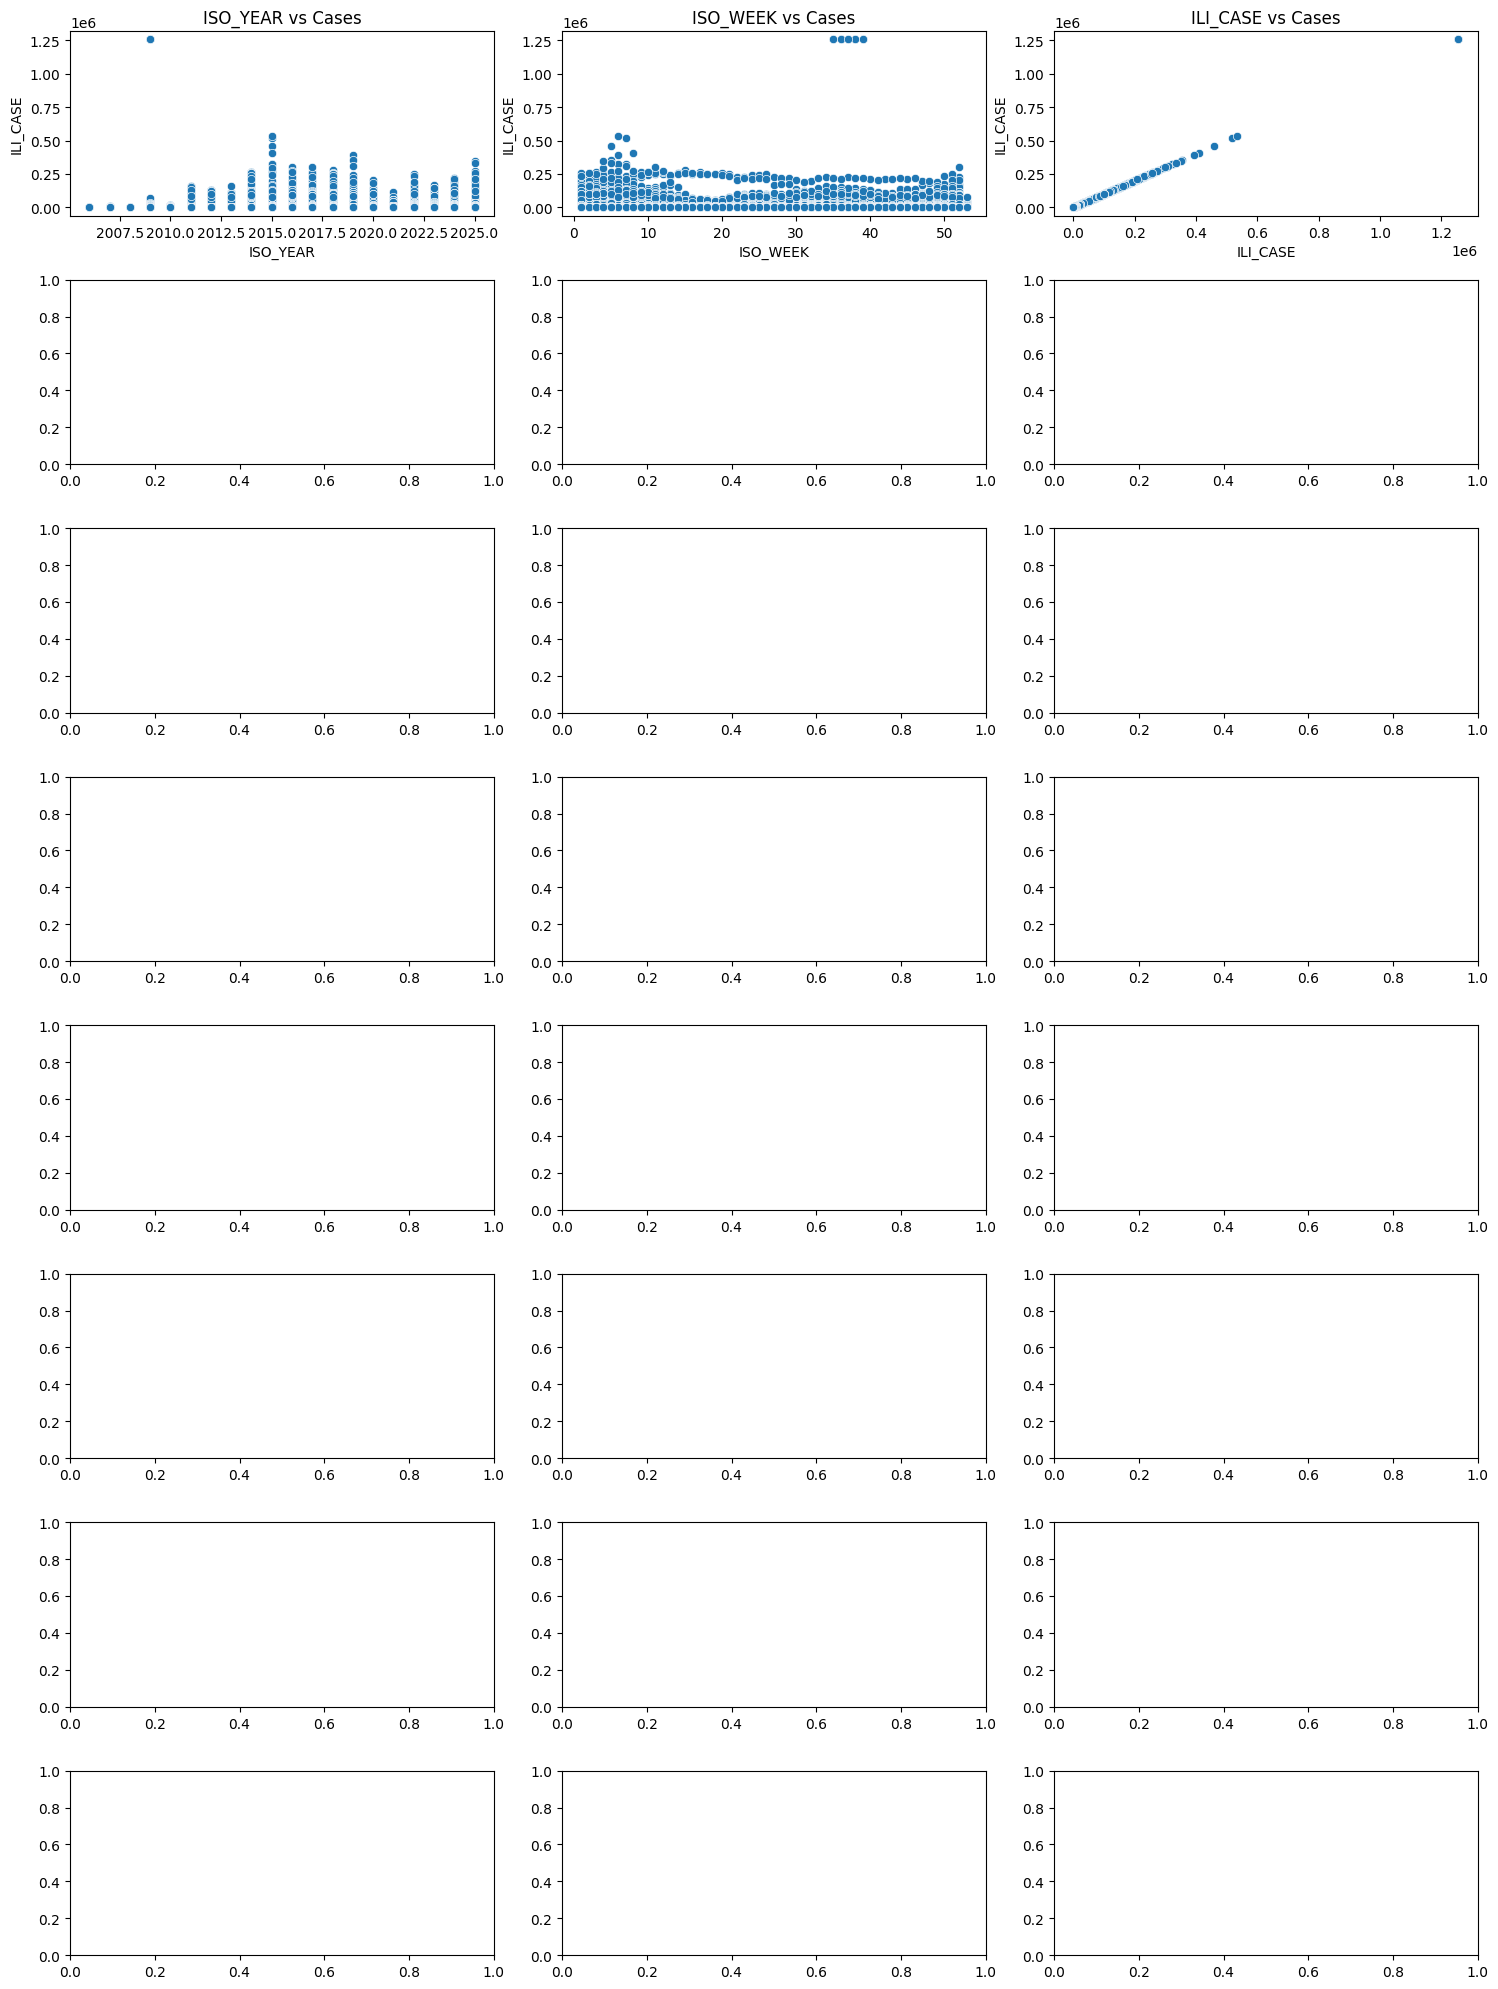

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt
Y = numerical_columns['ILI_CASE']
# Define the number of rows and columns for subplots
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_columns.columns[:-2]):  # Exclude 'inline'
    sns.scatterplot(data=numerical_columns, x=col, y=Y, ax=axes[i])
    axes[i].set_title(f'{col} vs Cases')

plt.tight_layout()
plt.show()


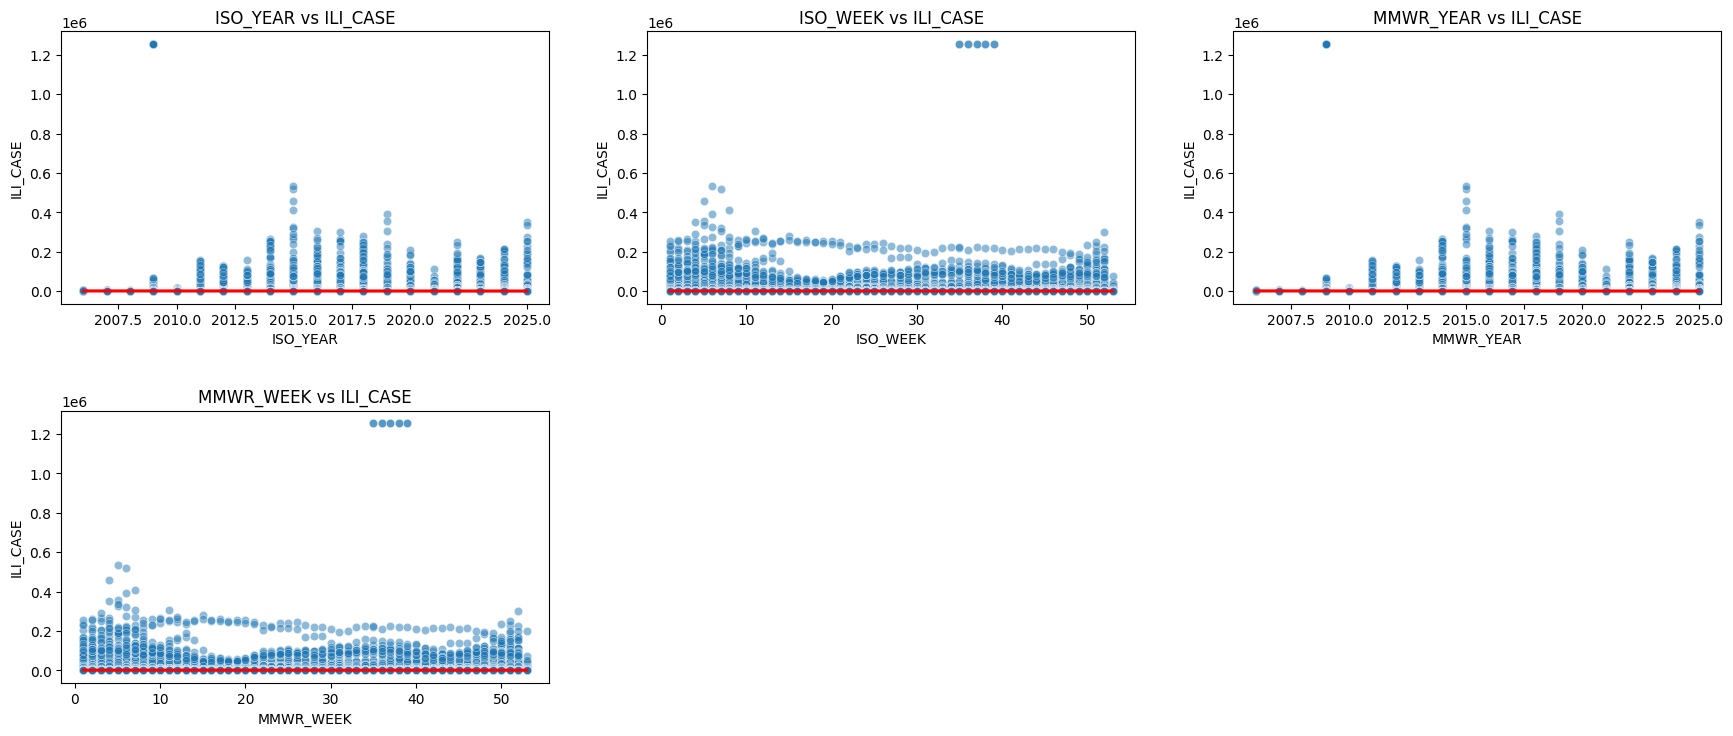

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature to plot against
x_feature = "ILI_CASE"  # Adjust based on your dataset
features = [col for col in numerical_columns.columns if col != x_feature]  # Exclude x_feature
num_features = len(features)

# Define subplot grid size
num_cols = 3  # Adjust for better layout
num_rows = -(-num_features // num_cols)  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 4 * num_rows))
axes = axes.flatten()

# Plot each numerical column against x_feature
for i, col in enumerate(features):
    sns.scatterplot(data=numerical_columns, x=col, y=x_feature, ax=axes[i], alpha=0.5)
    sns.regplot(data=numerical_columns, x=col, y=x_feature, ax=axes[i], scatter=False, color="red")  # Add trendline
    
    axes[i].set_title(f"{col} vs {x_feature}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(x_feature)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)  # Adjust spacing
plt.show()


In [31]:
cat_columns = df.select_dtypes(include = 'object')
cat_columns = cat_columns.drop(["ISO_WEEKSTARTDATE",'MMWR_WEEKSTARTDATE'], axis = 1)
cat_columns.head()


,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,AGEGROUP_CODE
0,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,0TO1
1,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,15TO49
2,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,ALL
3,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2TO4
4,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,15TO49


In [32]:
cat_columns.shape

(524329, 7)

In [33]:
cat_columns['MMWRYW'] = df['MMWRYW']

KeyError: 'MMWRYW'

In [34]:
cat_columns.head()

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,AGEGROUP_CODE
0,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,0TO1
1,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,15TO49
2,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,ALL
3,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2TO4
4,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,15TO49


In [35]:
cat_columns

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,AGEGROUP_CODE
0,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,0TO1
1,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,15TO49
2,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,ALL
3,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2TO4
4,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,15TO49
...,...,...,...,...,...,...,...
524324,WPR,YR,NH,FLU_SE_ASIA,VNM,Viet Nam,50TO64
524325,WPR,YR,NH,FLU_SE_ASIA,VNM,Viet Nam,65TO
524326,WPR,YR,NH,FLU_SE_ASIA,VNM,Viet Nam,All
524327,WPR,YR,NH,FLU_SE_ASIA,VNM,Viet Nam,2TO4


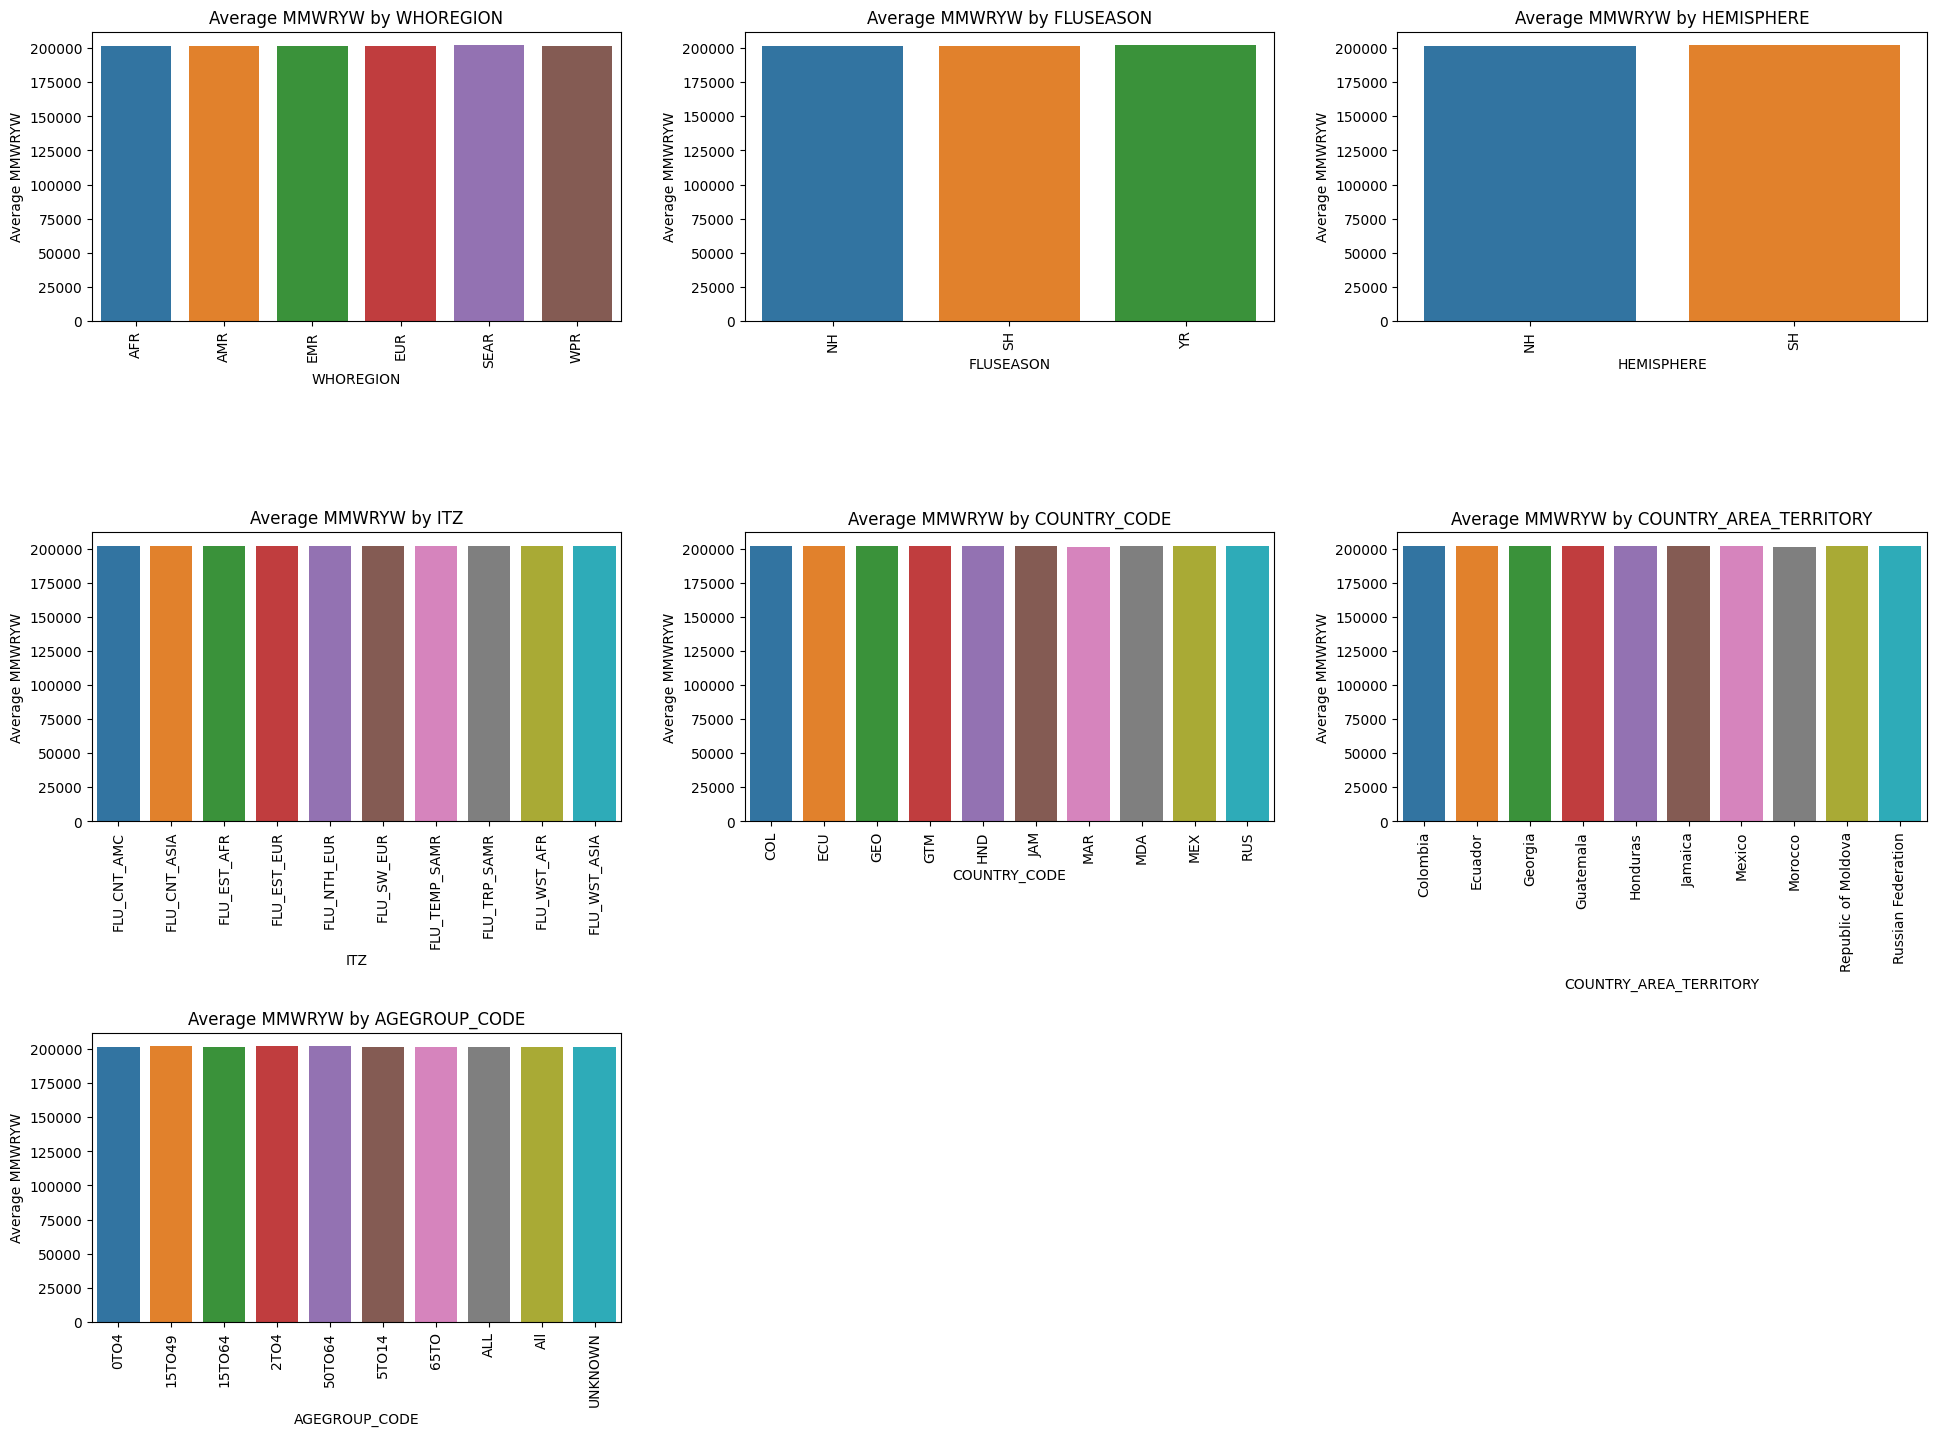

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure MMWRYR exists in cat_columns
if "ILI_CASE" not in cat_columns.columns:
    raise ValueError("column is missing from cat_columns. Add it before plotting.")

# Convert MMWRYR to numeric (if not already)
cat_columns["ILI_CASE"] = pd.to_numeric(cat_columns["ILI_CASE"], errors="coerce")

# Get categorical columns excluding MMWRYR
categorical_features = [col for col in cat_columns.columns if col != "ILI_CASE"]
num_cats = len(categorical_features)

# Define subplot grid size
num_cols = 3  # Adjust for better layout
num_rows = -(-num_cats // num_cols)  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Plot bar charts for each categorical feature against MMWRYR
for i, col in enumerate(categorical_features):
    unique_values = cat_columns[col].nunique()

    # If the column has too many unique values, show only the top 10 categories
    if unique_values > 10:
        top_10 = cat_columns[col].value_counts().index[:10]
        temp_df = cat_columns[cat_columns[col].isin(top_10)].copy()  # Ensure copy to keep MMWRYR
    else:
        temp_df = cat_columns.copy()

    # Ensure MMWRYR exists before grouping
    if "ILI_CASE" not in temp_df.columns:
        raise ValueError(f"ILI_CASE is missing in temp_df after filtering {col}")

    # Aggregate MMWRYR values properly before plotting
    agg_df = temp_df.groupby(col, as_index=False)["ILI_CASE"].mean()

    # Plot bar chart
    sns.barplot(data=agg_df, x=col, y="ILI_CASE", ax=axes[i], order=agg_df[col])
    
    axes[i].set_title(f"Average ILI_CASE by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Average MMWRYW")
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x labels for readability

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)  # Adjust spacing
plt.show()


This is way too uniform. There is some issue I cannot fix.

Variance of MMWRYW: 180707.58632000803
Grouped statistics for WHOREGION:
               count           mean         std       min       25%       50%  \
WHOREGION                                                                      
AFR         51737.0  201929.383285  357.783914  201017.0  201719.0  201939.0   
AMR        143759.0  201888.319910  404.462230  199640.0  201624.0  201928.0   
EMR         46769.0  201916.839873  392.951162  200636.0  201701.0  201942.0   
EUR        231805.0  201782.779759  456.905985  200552.0  201404.0  201823.0   
SEAR        20982.0  201981.826518  349.987046  201106.0  201718.0  202026.0   
WPR         29277.0  201854.700789  381.803949  201001.0  201551.0  201849.0   

                75%       max  
WHOREGION                      
AFR        202223.0  202510.0  
AMR        202226.0  202510.0  
EMR        202237.0  202509.0  
EUR        202205.0  202510.0  
SEAR       202306.0  202510.0  
WPR        202146.0  202510.0  
Grouped statistics for FLUSEA

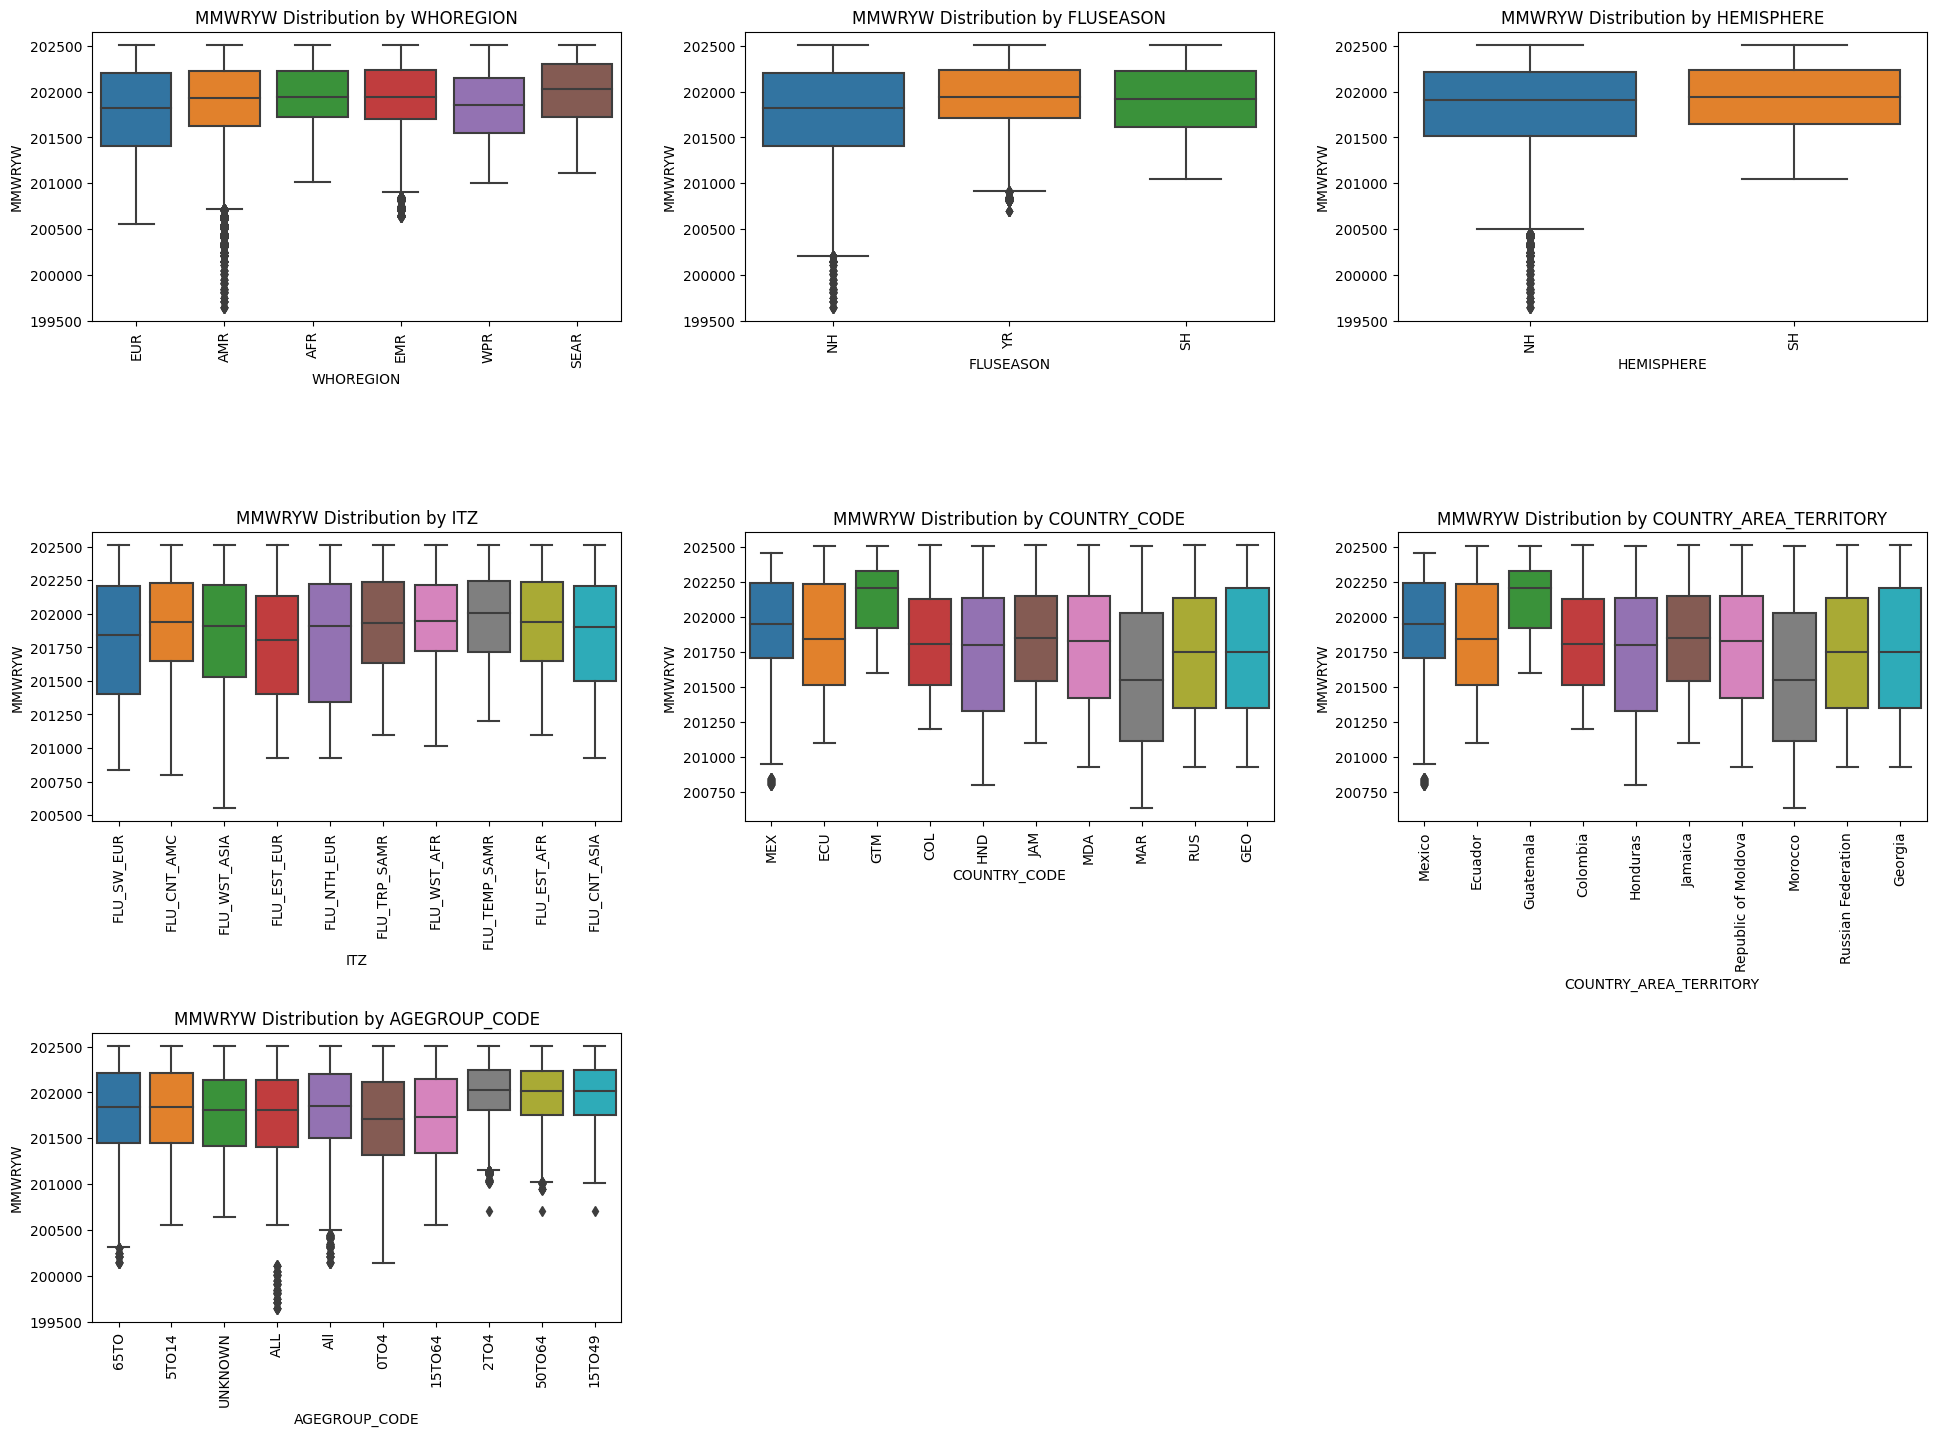

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure MMWRYW exists in cat_columns
if "MMWRYW" not in cat_columns.columns:
    raise ValueError("MMWRYW column is missing from cat_columns. Add it before plotting.")

# Convert MMWRYW to numeric (if not already)
cat_columns["MMWRYW"] = pd.to_numeric(cat_columns["MMWRYW"], errors="coerce")

# Check variance
print("Variance of MMWRYW:", cat_columns["MMWRYW"].var())

# Get categorical columns excluding MMWRYW
categorical_features = [col for col in cat_columns.columns if col != "MMWRYW"]
num_cats = len(categorical_features)

# Define subplot grid size
num_cols = 3  # Adjust for better layout
num_rows = -(-num_cats // num_cols)  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Plot boxplots for a better understanding of distribution
for i, col in enumerate(categorical_features):
    unique_values = cat_columns[col].nunique()

    # If the column has too many unique values, show only the top 10 categories
    if unique_values > 10:
        top_10 = cat_columns[col].value_counts().index[:10]
        temp_df = cat_columns[cat_columns[col].isin(top_10)].copy()
    else:
        temp_df = cat_columns.copy()

    # Check grouped values before plotting
    grouped = temp_df.groupby(col)["MMWRYW"].describe()
    print(f"Grouped statistics for {col}:\n", grouped)

    # Plot using a boxplot to see distribution
    sns.boxplot(data=temp_df, x=col, y="MMWRYW", ax=axes[i], order=temp_df[col].value_counts().index)
    
    axes[i].set_title(f"MMWRYW Distribution by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("MMWRYW")
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x labels for readability

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)  # Adjust spacing
plt.show()


# Nice. 

## More stats for continuous variables

In [36]:
df.shape

(524329, 15)

In [37]:
df.describe()

,ISO_YEAR,ISO_WEEK,ISOYW,ILI_CASE,MMWR_YEAR,MMWR_WEEK
count,524329.000000,524329.000000,524329.000000,3.181240e+05,524329.000000,524329.000000
mean,2018.243332,25.892056,201850.225252,9.030230e+02,2018.242348,25.886400
std,4.256309,15.454013,425.009341,1.023700e+04,4.257206,15.455003
min,1996.000000,1.000000,199640.000000,0.000000e+00,1996.000000,1.000000
25%,2015.000000,12.000000,201534.000000,0.000000e+00,2015.000000,12.000000
50%,2019.000000,25.000000,201915.000000,1.200000e+01,2019.000000,25.000000
75%,2022.000000,40.000000,202218.000000,9.800000e+01,2022.000000,40.000000
max,2025.000000,53.000000,202510.000000,1.255870e+06,2025.000000,53.000000


# **Exploratory Data Analysis (EDA) Summary**
---

## **1️⃣ Data Overview**
- The dataset includes **both numerical and categorical variables**, with `MMWRYW` being a key target variable.
- **Missing values** were checked, and columns with more than **40% missing data were removed**.
- After prelimnary work, we are left with `524329` rows and `16` columns.
---

## **2️⃣ Numerical Features vs. MMWRYW**
- **Scatter plots and regression lines** were used to analyze relationships between numerical variables and `MMWRYW`.
- **Key observations:**
  - `ISO_YEAR` and `MMWR_YEAR` show a **strong linear correlation** with `MMWRYW`, indicating time progression.
  - `ISO_WEEK` and `MMWR_WEEK` have **little to no correlation**, suggesting weekly fluctuations in `MMWRYW`.
  - `ILI_CASE` exhibits a **negative correlation** with `MMWRYW`, implying that as ILI cases increase, `MMWRYW` decreases.

---

## **3️⃣ Categorical Features vs. MMWRYW**
- **Boxplots were used** to analyze the distribution of `MMWRYW` across categorical variables.
- **Key findings:**
  - `FLUSEASON`, `HEMISPHERE`, and `WHO_REGION` show **variations in the distribution of `MMWRYW`**, but no extreme differences.
  - `COUNTRY_CODE` and `COUNTRY_AREA_TERRITORY` have a **wider spread**, indicating `MMWRYW` varies significantly between different locations.
  - **Outliers were present in several categories**, especially in `AGEGROUP_CODE`.

---

## **4️⃣ Summary of Insights**
- **Time-based trends**: `MMWRYW` follows a consistent upward trend over the years.
- **Geographical factors**: Regional differences in `MMWRYW` exist but are not extreme.
- **Epidemiological correlations**: `ILI_CASE` has an inverse relationship with `MMWRYW`, suggesting potential seasonal effects.

---

## **5️⃣ Next Steps**
- Perform **further feature engineering** on categorical variables to assess their predictive power.
- Investigate whether **seasonal variations** impact `MMWRYW` significantly.
- Apply **statistical tests** to confirm relationships and assess significance.

---

📊 **This EDA provided key insights into the structure and trends of `MMWRYW`. Further modeling and hypothesis testing are needed to draw stronger conclusions.** 🚀


In [128]:
df.to_csv("filter1.csv", index = False)

In [129]:
df.head()

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,ISOYW,AGEGROUP_CODE,ILI_CASE,MMWR_WEEKSTARTDATE,MMWR_YEAR,MMWR_WEEK,MMWRYW
0,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-09,2024,50,202450,0TO1,38.0,2024-12-08,2024,50,202450
1,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-16,2024,51,202451,15TO49,211.0,2024-12-15,2024,51,202451
2,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-16,2024,51,202451,ALL,569.0,2024-12-15,2024,51,202451
3,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2025-01-27,2025,5,202505,2TO4,278.0,2025-01-26,2025,5,202505
4,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2025-02-24,2025,9,202509,15TO49,1022.0,2025-02-23,2025,9,202509


We drop ISOYW since it's redundant
Also some time series and general formatting

In [38]:
df['MMWR_WEEKSTARTDATE'] = pd.to_datetime(df['MMWR_WEEKSTARTDATE'], format='%Y-%m-%d', errors='coerce')
df['MMWR_WEEKSTARTDATE'] = df['MMWR_WEEKSTARTDATE'].dt.day
df = df.rename({"MMWR_WEEKSTARTDATE" : "MMWR_DATE"}, axis = 1)

df.head()

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,ISOYW,AGEGROUP_CODE,ILI_CASE,MMWR_DATE,MMWR_YEAR,MMWR_WEEK
0,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-09,2024,50,202450,0TO1,38.0,8,2024,50
1,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-16,2024,51,202451,15TO49,211.0,15,2024,51
2,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-16,2024,51,202451,ALL,569.0,15,2024,51
3,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2025-01-27,2025,5,202505,2TO4,278.0,26,2025,5
4,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2025-02-24,2025,9,202509,15TO49,1022.0,23,2025,9


In [39]:
df = df.drop("ISOYW", axis =1)

In [40]:
df['MMWR_DATE'].unique()

array([ 8, 15, 26, 23,  2,  3, 10, 24, 31,  7, 14, 28,  6, 13, 20, 17, 22,
       29, 12, 19, 21, 11, 25, 18,  1,  5,  9, 27,  4, 16, 30],
      dtype=int32)

In [41]:
df.head()

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,AGEGROUP_CODE,ILI_CASE,MMWR_DATE,MMWR_YEAR,MMWR_WEEK
0,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-09,2024,50,0TO1,38.0,8,2024,50
1,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-16,2024,51,15TO49,211.0,15,2024,51
2,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2024-12-16,2024,51,ALL,569.0,15,2024,51
3,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2025-01-27,2025,5,2TO4,278.0,26,2025,5
4,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2025-02-24,2025,9,15TO49,1022.0,23,2025,9


Seems good enough

# Data Manipulation

## Imputing

In [42]:
from sklearn.impute import SimpleImputer

# Define imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Select numerical and categorical columns
num_col = df.select_dtypes(include="number").columns
cat_col = df.select_dtypes(include="object").columns

# Apply imputation for numerical columns
df[num_col] = num_imputer.fit_transform(df[num_col])

# Apply imputation for categorical columns
df[cat_col] = cat_imputer.fit_transform(df[cat_col])

# Check for any remaining missing values
print(df.isnull().any())


WHOREGION                 False
FLUSEASON                 False
HEMISPHERE                False
ITZ                       False
COUNTRY_CODE              False
COUNTRY_AREA_TERRITORY    False
ISO_WEEKSTARTDATE         False
ISO_YEAR                  False
ISO_WEEK                  False
AGEGROUP_CODE             False
ILI_CASE                  False
MMWR_DATE                 False
MMWR_YEAR                 False
MMWR_WEEK                 False
dtype: bool


## Scaling

In [43]:
num_col

Index(['ISO_YEAR', 'ISO_WEEK', 'ILI_CASE', 'MMWR_DATE', 'MMWR_YEAR',
       'MMWR_WEEK'],
      dtype='object')

Only need to scale `ILI_CASE`

In [137]:
## DON"T SCALE

count    524329.000000
mean          0.759472
std           8.879349
min          -0.246096
25%          -0.240528
50%           0.000000
75%           0.759472
max        1398.236962
Name: ILI_CASE, dtype: float64

## ENCODING

In [44]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
cat_col

Index(['WHOREGION', 'FLUSEASON', 'HEMISPHERE', 'ITZ', 'COUNTRY_CODE',
       'COUNTRY_AREA_TERRITORY', 'ISO_WEEKSTARTDATE', 'AGEGROUP_CODE'],
      dtype='object')

In [53]:
cat_col

Index(['WHOREGION', 'FLUSEASON', 'HEMISPHERE', 'ITZ', 'COUNTRY_CODE',
       'COUNTRY_AREA_TERRITORY', 'ISO_WEEKSTARTDATE', 'AGEGROUP_CODE'],
      dtype='object')

In [59]:
cat_col

Index(['WHOREGION', 'FLUSEASON', 'HEMISPHERE', 'ITZ', 'COUNTRY_CODE',
       'COUNTRY_AREA_TERRITORY', 'AGEGROUP_CODE'],
      dtype='object')

In [60]:
df[cat_col] = encode.fit_transform(df[cat_col])
df.head()

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_YEAR,ISO_WEEK,AGEGROUP_CODE,ILI_CASE,MMWR_DATE,MMWR_YEAR,MMWR_WEEK
0,0.0,0.0,0.0,6.0,47.0,2.0,2024.0,50.0,7.0,38.0,8.0,2024.0,50.0
1,0.0,0.0,0.0,6.0,47.0,2.0,2024.0,51.0,24.0,211.0,15.0,2024.0,51.0
2,0.0,0.0,0.0,6.0,47.0,2.0,2024.0,51.0,102.0,569.0,15.0,2024.0,51.0
3,0.0,0.0,0.0,6.0,47.0,2.0,2025.0,5.0,54.0,278.0,26.0,2025.0,5.0
4,0.0,0.0,0.0,6.0,47.0,2.0,2025.0,9.0,24.0,1022.0,23.0,2025.0,9.0


Yummy, we can finally train a ML model. 

# Summary

- **Categorical Columns**: 7
- **Continuous Columns**: 1
- **Time-Series Columns**: 5
- **Target Feature**: 1 (MMWRYW)

In [61]:
df.to_csv("filter2.csv")